<a href="https://colab.research.google.com/github/chierighini/notes/blob/main/applied_data_science_python3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apllied Data Science with Python, Part 3
The first cells are only a setup for what will be done next.

In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

The following is an already formatted csv of the same table used previously. It is hosted by the cognitive class platform.

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv

In [ ]:
df = pd.read_csv("/content/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Exploratory data analysis
In this stage we explore the data to get a better understanding of it, summarize the most important points of our data, discover relationships between different variables and extract what is the most useful.

Following the previous parts, we will be trying to determine the price of used cars using the same dataset.

This module of the course covers:
* Descriptive statistics
* Groupby
* ANOVA (Analysis of variance)
* Correlation
* Correlation-statistics

https://courses.cognitiveclass.ai/courses/course-v1:CognitiveClass+DA0101EN+2017/courseware/bab98e3892694bd5aae8d0f7dc111a30/cc7ec52c80f84715ba989fee74778ddc/1?activate_block_id=block-v1%3ACognitiveClass%2BDA0101EN%2B2017%2Btype%40vertical%2Bblock%40146fa0445376445cb930be302b3e8a97


It is possible to see the correlation between `float64` and `int64` by using the `corr()` method from pandas.

## Descriptive Statistics
The main goal of descriptive statistics is to describe the basic features of the data and give short summaries about it.

Pandas has a function called ```describe()``` which gives you a small descriptive summary of your numerical values, ignoring the ```NaN``` values.

Another useful function is ```value_counts()```, which summarizes categorical data.


### Box plots
Box plots area way of representing the data such as we can clearly see: 
* the median value 
* the upper and lower quartiles (75% and 25%, respectively)
* the Interquartile range, which is the data between the upper and lower quartiles
* the upper and lower extremes, which are calculated as 1.5 times the interquartile range bot above the 75% mark and below the 25% mark
* outer data points

Note that the upper and lower extremes are calculated based off of the quartiles, therefore it's possible to have outlier data, since the extremes are not correspondent to the maximum and minimum values of the data.

### Scatter Plots
In this type of plot, each observation is a point. It's possible to use this type of plot to show a relationship between two variables, where the predictor variable is positioned on the x-axis and the target variable is placed on the y-axis.

### Descriptive statistical analysis
The `describe()` function does most of the work for us:

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


It ignores `object` type variables, which can be described using:

In [ ]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### Value Counts
Value counts is a good way of seeing how many units of each variable we have. The pandas method `value_counts(0)` does this, however it must be used on pandas sets, and not dataframes, therefore, we must pass the argument as `df[column]` and not `df[[column]]`

In [ ]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert it to a dataframe using:

In [ ]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Now to make it into an actual data frame:

In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


The same for engine location: 

In [ ]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Since most of the cars have a front engine, with only three having the rear engine, this is not a good predictor for the prices.

## GroupBy in python
Pandas has this function built in to group data into categories, being that single variables or multiple variables. This can be applied to categorical variables.

We can also use pivot tables to make the data more readable, as one variable will be displayed as columns and the other, as rows.

Heatmaps are also a great way of visualizing your data in a more intuitive manner, so that you can more easily observe the colors and their meanings.

### Basics of grouping

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Here we have three categories if we group by "drive-wheels"

Now to average it with other values:

In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

In [ ]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


It's possible to see that rear driving wheel cars are the most expensive cars, while the other two groups are very close to each other.

It is also possible to group it by more than one variable:


In [ ]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


To make it more readable, we can put it as a pivot table, which looks like an excel spreadsheet:

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

To fill out the NaN we can, in this case, just place a zero on it, although missing data has it's comlexity and it's not as easy to solve as "just put a zero on it"

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

##### Exercise
Find the average price of a car based on it's body style.

In [ ]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


As a next step, we'll put it on a heat map:

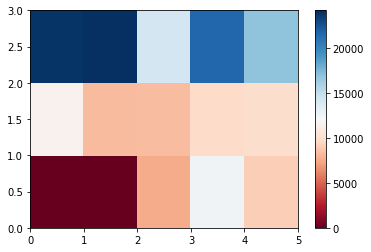

In [ ]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

And now change the labels to something a little more useful:

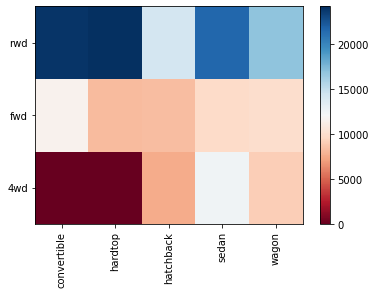

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## ANOVA - Analysis of variance
ANOVA is a test performed to find a correlation between different groups of a categorical variable. It gives us 
* an F-test score, which is the variation between sample group means divided by variation within the same group
* p-value, which is the confidence degree

If the price is correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.


Let's see that with the "drive-wheels" column and "price":

In [ ]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [ ]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


It's possible to get the groups by using the following synthax:

In [ ]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

And by using the `f_oneway()` method from the `stats` module, we can calculate the F-test score and the P-value:

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Now separating the groups:

In [ ]:
#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [ ]:
#4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [ ]:
#4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## Correlation
Correlation measures to what extent variables are interdependent, such as somking being correlated to lung cancer.

correlation doesn't imply causation.


## Correlation-statistics
Insights on a few correlation methods.

### Pearson correlation
Measures the strength of the corrolation between continuous numerical values.

It gives out two values:
* Correlation coeficient
* P-values

For the correlation coeficient, a value close to 1 represents a positive relationship, a value close to -1, a negative relationship, and a value close to zero represents that there is no relationship.

As for the P-values:
* P < 0.001 means a strong certainty on the result
* P < 0.05 means a moderate certainty on the result
* P < 0.1 means a weak certainty on the result
* P > 0.1 means no certainty on the result

### Correlation and causation
The default method for the `corr()`function is the Pearson correlation.

In [ ]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Now to see the coeficient and the P-Value, we do:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


The "wheel-base" column does not have a very strong relationship with the "price", however, it is statistically very significant, since the P-value is much smaller than 0.001.

Now, for Horsepower vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


A very signficant statistical value and a strong coeficient.

Length vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


A significant statistical value and a not so strong coeficient.

Width vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


A significant statistical value and a strong coeficient.

Curb-weight vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


A very strong coeficient with a significant statistical value.

Engine-size vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


A very strong coeficient with a significant statistical value.

Bore vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


A moderate coeficient with a good statistical significance.

City-mpg vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


A good statistical significance and a moderatly strong negative coeficient.

Highway-mpg vs Price:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


A good statistical significance and a moderatly strong negative coeficient.

## Lab Exercises

### Analyzing Individual Feature Patterns using Visualization
Whenever doing any analysis, it is important to know what type of variables we're dealing with:

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [ ]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


It is also possible to show the correlation between few columns.

In [ ]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


Notice a diagonal line that has only the number one. That is because we are comparing the same variable, so it's only logic that they result in a correlation coeficient of one.

#### Continuous numerical variables
It is possible to see the relationships between continuous numeric values by examples:

##### Positive relationship

(0.0, 53730.16776195548)

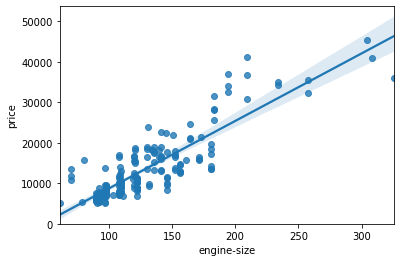

In [ ]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


As you can see, there is a positive correlation between "price" and "engine-size", since the coeficient is both positive and close to 1. As "engine-size" increases, the price also increases.

##### Negative relationship

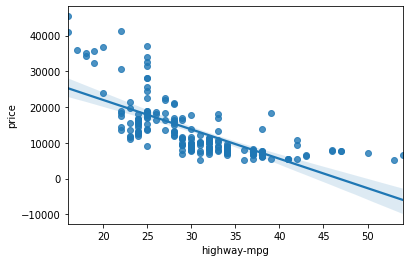

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


The values of "highway-mpg" and "price" have a negative relationship, since the value is both negative and close to -1. As "highway-mpg" increases, so decreases the price.

##### Weak Linear Relationship

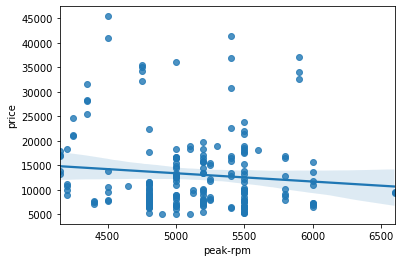

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


As you can see, the relationship between these two variables is a very weak one, since the coeficient is very close to 0.

##### Exercise
Find the correlation between "stroke" and "price"

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


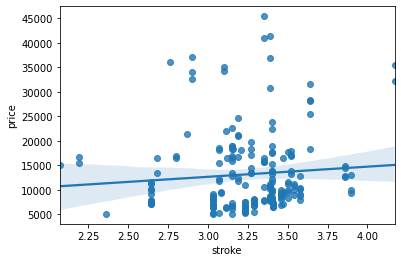

In [ ]:
sns.regplot(x="stroke", y="price", data=df)
df[['stroke','price']].corr()

They have a very weak relationship, due to the fact that the coeficient is very close to zero.

#### Categorical variables
Linear Regression does not work well for categorical values. That leaves us to find other ways to analyze them.

##### Box plots

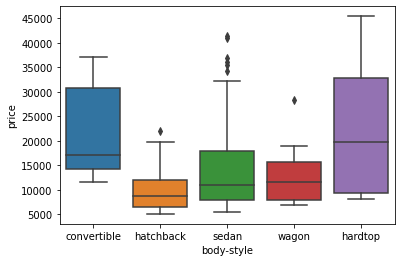

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

Since the price range for the body style of the cars is mostly overlapping, this is not a good variable to measure.

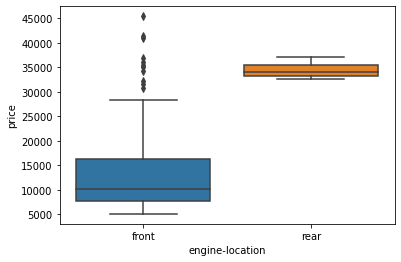

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

Now that the ranges are not overlapping, this could be a good variable to use.

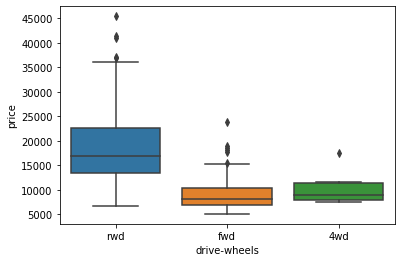

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)

The ditribution for drive wheels is also different, which is also a good variable to use for price prediction.

##Conclusions
After all that analysis it is possible to narrow down all of the important variables in determining a cars price to:

1. Numerical:
  * Length
  * Width
  * Curb-weight
  * Engine-size
  * Horsepower
  * City-mpg
  * Highway-mpg
  * Wheel-base
  * Bore
2. Categorical:
  * Drive-wheels

#Final Considerations

This notebook was based off of the "applied data science with python" course from cognitive class (https://cognitiveclass.ai/) and is a compilation of my notes and important topics from it.

This course is one of the best things I came across as a student and I'm very thankful for IBM to have made this available for free.

A few parts were taken out of their lab notebook, that was written by the following people:

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

Kudos to IBM and it's authors for keeping this knowledge free.